
# Pregunta 2 (10 puntos)
# Antes de resolver los incisos, se recomienda leer todo el enunciado para identificar apropiadamente los tipos de datos de cada argumento de entrada de su función y evitar arrastre de error.
El coeficiente de correlación de Pearson se calcula de la siguiente manera:
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{x})^2\right)\left(\sum_{i=1}^{n} (y_i - \bar{y})^2\right)}}$$

Donde $x_i$ e $y_i$ son los términos i-ésimos de los arreglos x e y, respectivamente y $\bar{x} e \bar{y}$ son los valores promedios de los arreglos x e y, respectivamente.

Siendo así, se le pide lo siguiente:

a) (2.0 puntos) Codificar una función en C que calcule el coeficiente de correlación de Pearson. Para ello, considerar que debe recibir como argumentos de entrada dos arreglos de precisión simple, los valores promedios de ambos arreglos y el tamaño del arreglo. Además, se requiere que el valor del coeficiente hallado sea de alta precisión.

In [264]:
%%file main.c 

#include <stdio.h>
#include <math.h>

double correlacion_pearson(double *x, double *y, double mean_x, double mean_y, int n) {
    double numerador = 0.0;
    double denominador_x = 0.0;
    double denominador_y = 0.0;

    for (int i = 0; i < n; i++) {
        numerador += (x[i] - mean_x) * (y[i] - mean_y);
        denominador_x += pow(x[i] - mean_x, 2);
        denominador_y += pow(y[i] - mean_y, 2);
    }

    double correlacion = numerador / sqrt(denominador_x * denominador_y);

    return correlacion;
}

Overwriting main.c


In [265]:
! gcc -c main.c -o main.o

In [266]:
! gcc -shared main.o -o main.so

b) (2.0 puntos) Codificar una función en Python que halle el coeficiente de correlación de Pearson. Incluir sus argumentos de entrada y su salida.

In [267]:
import math
def correlacion_pearson(x,y, x_mean, y_mean, N):
    numerador = 0
    x_denominador = 0
    y_denominador = 0  
    for i in range(N):
        numerador += (x[i] - x_mean ) * ( y[i] - y_mean )
        x_denominador += (x[i] - x_mean)**2
        y_denominador += (y[i] - y_mean)**2

    pearson = numerador/(math.sqrt(x_denominador * y_denominador))
    
    return pearson
                           

c) (2.0 punto) Llamar a la librería de C a través de Ctypes. Considerar que en este inciso se puede descontar puntaje adicional si es que los tipos de dato no han sido correctamente identificados.

In [268]:
import ctypes
import numpy as np

lib = ctypes.CDLL('./main.so') 

lib.correlacion_pearson.argtypes = [np.ctypeslib.ndpointer(dtype=np.double),  
                                    np.ctypeslib.ndpointer(dtype=np.double),  
                                    ctypes.c_double, 
                                    ctypes.c_double,
                                    ctypes.c_int
                                    ]
lib.correlacion_pearson.restype = ctypes.c_double


d) (1.0 punto) Probar sus funciones con 2 arreglos aleatorios de 16 elementos. Usar el resultado de la función numpy.corrcoef(arreglo1,arreglo2) como referencia.

In [269]:
arreglo1 = np.random.rand(16)
arreglo2 = np.random.rand(16)

mean_x = np.mean(arreglo1)
mean_y = np.mean(arreglo2)

rpta_c = lib.correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, len(arreglo1))
rpta_py = correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, len(arreglo1))
rpta_numpy = np.corrcoef(arreglo1, arreglo2)[0, 1]

# Imprimir los resultados
print(f"Resultado de la función de C: {rpta_c}")
print(f"Resultado de la funcion de Python: {rpta_py}")
print(f"Resultado de numpy.corrcoef: {rpta_numpy}")

Resultado de la función de C: -0.035647734287791076
Resultado de la funcion de Python: -0.035647734287791076
Resultado de numpy.corrcoef: -0.035647734287791076


e) (1.0 punto) Mostrar una gráfica del análisis temporal para un tamaño de elementos igual a 1024. Considerar 25 iteraciones.

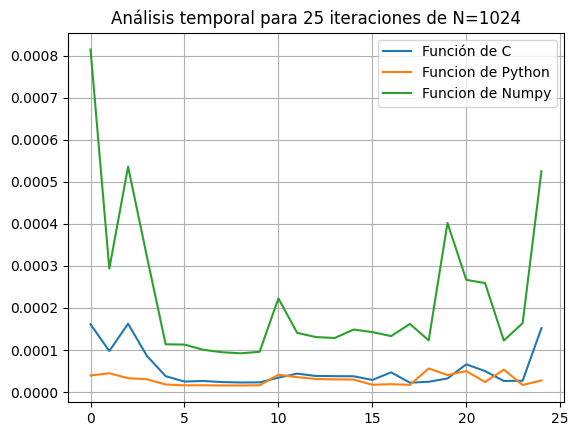

In [270]:
import time 
import matplotlib.pyplot as plt

N = 1024
iter = 25

c_time= []
py_time = []
numpy_time = []


for i in range(iter):

    c_start_time = time.time()
    rpta_c = lib.correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, len(arreglo1))
    c_end_time = time.time()
    c_time.append(c_end_time - c_start_time) 

    py_start_time = time.time()
    rpta_c = correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, len(arreglo1))
    py_end_time = time.time()
    py_time.append(py_end_time - py_start_time) 

    numpy_start_time = time.time()
    rpta_numpy = np.corrcoef(arreglo1, arreglo2)[0, 1]
    numpy_end_time = time.time()
    numpy_time.append(numpy_end_time - numpy_start_time) 



plt.plot(range(iter),c_time, label='Función de C')
plt.plot(range(iter),py_time, label='Funcion de Python')
plt.plot(range(iter),numpy_time, label='Funcion de Numpy')
plt.legend()
plt.grid(True)
plt.title('Análisis temporal para 25 iteraciones de N=1024')
plt.show()

f) (1.0 punto) Mostrar una gráfica del SpeedUP para valores de N que van desde $2^{10}$ hasta $2^{16}$. No olvidar las iteraciones y el cálculo de la mediana para tomar el tiempo representativo para cada N.

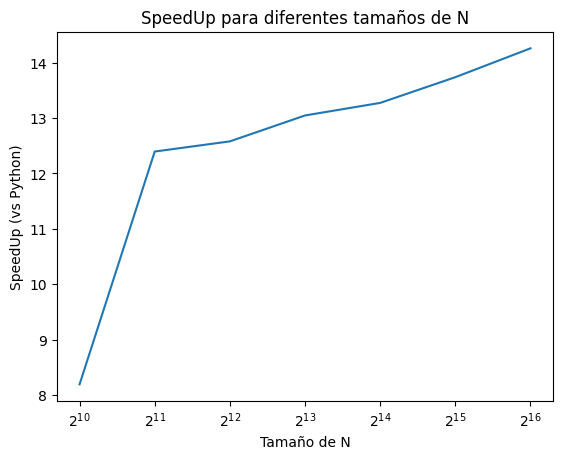

In [271]:
size = [2**i for i in range(10, 17)]
iter= 25
big_c_times = []
big_py_times= []

for N in size:
    c_times = []
    py_times = []

    for _ in range(iter):

        arreglo1 = np.random.rand(N)
        arreglo2 = np.random.rand(N)
        
        mean_x = np.mean(arreglo1)
        mean_y = np.mean(arreglo2)

        c_start_time = time.time()
        rpta_c = lib.correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, N)
        c_end_time = time.time()
        c_times.append(c_end_time - c_start_time)

        py_start_time = time.time()
        rpta_py = correlacion_pearson(arreglo1, arreglo2, mean_x, mean_y, N)
        py_end_time = time.time()
        py_times.append(py_end_time - py_start_time)

    # Calcular la mediana de los tiempos
    big_c_times.append(np.median(c_times))
    big_py_times.append(np.median(py_times))

# Calcular el SpeedUp
#speedup = [big_c_times /big_py_times for big_py_times,big_c_times in zip(big_py_times, big_c_times)]
speedup = np.divide(big_py_times, big_c_times)
# Graficar speedup
plt.plot(size, speedup)
plt.xscale('log', base=2)
plt.xlabel('Tamaño de N')
plt.ylabel('SpeedUp (vs Python)')
plt.title('SpeedUp para diferentes tamaños de N')
plt.show()

g) (1.0 punto) Realizar comentarios acerca de sus experiencias. Incluir específicamente sus conclusiones en las diferencias de implementación de C y Python.

Respuesta:


Diferencia de implementación:

El código C utiliza un bucle for estándar para iterar sobre los elementos de la matriz.
El código Python utiliza funciones de rango y bucles for, similar al código C.
Ambas implementaciones son muy similares en términos de lógica algorítmica.
Rendimiento:

Aunque los comentarios indican que Python es más rápido, es importante tener en cuenta que Python es generalmente más lento que C debido a su naturaleza interpretada.
En algunos casos, Python puede funcionar de manera similar a C cuando se usan bibliotecas optimizadas como NumPy, pero C aún tiende a ser más rápido.
Tipo de localidad:

Temporal: Ambos códigos exhiben un buen comportamiento de localidad temporal porque utilizan un caché para acceder a los elementos de la matriz de forma secuencial.
Espacial: la localidad espacial también es buena porque los elementos de la matriz se almacenan de forma contigua en la memoria.
Memoria:

La administración de la memoria se realiza directamente de forma manual en C, mientras que en Python el recolector de basura maneja la administración automática de la memoria.
C brinda a los programadores más control sobre la asignación y desasignación de memoria.